**Foreword**<br>
Inspired by the Momentum factor, which is the past cumulative return, this short notebook studies the movement of stock price. During a given period, there are peak and troughs in a time series of stock price. We are going to find out the following:<br><br>
1.Speed of moving from trough to peak (also peak to trough)<br>
2.Number of upward/downward movement<br><br>

**Create Moving Average function**<br>
To find out the number of upward/dowanward movement, we first need to find out the turning point.<br>
However there are too many ups and downs, while some of them are in small magnitude. <br>
Moving Average can smooth the time series.

In [9]:
from datetime import datetime, timedelta
import yfinance as yf  
import numpy as np
import pandas as pd

# get data n years from today
def get_price(portfolio):
    px = yf.download(portfolio,start='2015-01-01',end='2017-12-31')['Adj Close'].to_numpy()
    return px[~np.isnan(px)]
#def get_price(portfolio,n):
#    t_0 = datetime.today() - timedelta(365*n)
#    px = yf.download(portfolio,start=t_0)['Adj Close'].to_numpy()
#    return px[~np.isnan(px)]

# get n days moving average price
def n_days_moving_avg(px,n):
    ma = np.zeros((len(px)-n+1)) + px[n-1:] #initialize array ma
    for i in range(n-1):
        ma += px[n-2-i:-1-i]
    return ma/n

**Demonstration of n days Moving Average**<br>
It is observed that larger n gives smoother curve and less signal.<br>
The red line (n=10) presents reasonable amount of turning points without including too many or too less signals.

[*********************100%***********************]  1 of 1 completed


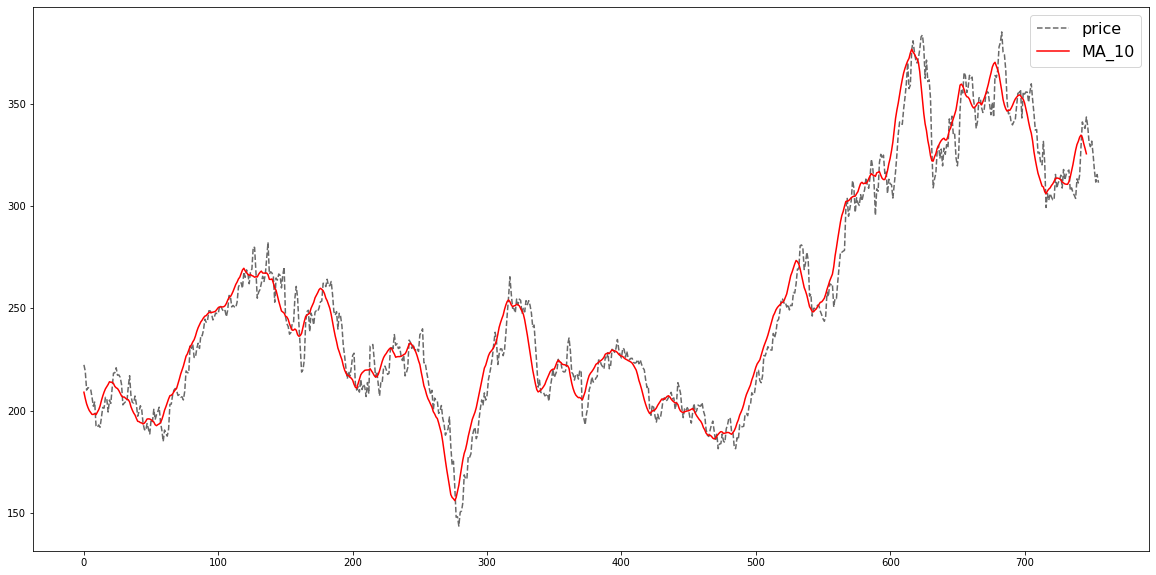

In [10]:
portfolio = ['TSLA'] 
px = np.round(get_price(portfolio),4)
ma_px = n_days_moving_avg(px,10)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(px, '--',color='dimgray', label="price",)
plt.plot(ma_px, color='red', label="MA_10")
plt.legend(loc="upper right",fontsize=16)

**Find out turning points by 1st and 2nd difference**<br>
When the sign of 1st difference changes, it indicates an turning point. When the 2nd difference less than zero, it indicates a maximum point. <br>
However, some turning points are still very close after applying moving average.<br>
For example, at time t = 7, price = 198.582 while the next turing point is 198.094.

In [11]:
sec_diff = np.diff(np.sign(np.diff(ma_px)))

# find out turning points
turn_pt = []
for i in range(len(sec_diff)):
    if sec_diff[i]<0:
        turn_pt.append([i, ma_px[1:-1][i]])
    elif sec_diff[i]>0:
        turn_pt.append([i, ma_px[1:-1][i]])
        
turn_pt[:10]

[[6, 198.205],
 [7, 198.58200000000002],
 [8, 198.094],
 [18, 214.15699999999998],
 [19, 213.925],
 [20, 213.942],
 [28, 206.66799999999998],
 [29, 206.714],
 [43, 193.536],
 [47, 196.027]]

**Eliminate insignifcant turning points**<br>
After applying a threshold of 2% change, the turning points are now more 'meaningful'.

In [12]:
# filter significant points using threshold=2%
turn_pt = [turn_pt[i] for i in range(len(turn_pt)-1) if abs(turn_pt[i+1][1]/turn_pt[i][1] - 1) > 0.02]

turn_pt[:10]

[[8, 198.094],
 [20, 213.942],
 [29, 206.714],
 [53, 192.70700000000002],
 [102, 250.69400000000002],
 [139, 264.35999999999996],
 [159, 236.35399999999996],
 [175, 259.793],
 [202, 211.01699999999997],
 [216, 216.46499999999997]]

**Output for Regression**<br>
The following code generates variables

**Dependent variable $r_i$** <br>
r = return of a given period

**Independent variables $\X_{i}$** <br>
num_up = Number of travel from trough to peak<br>
num_down = Number of travel from peak to trough<br>
speed_up = Average ascent speed<br>
speed_down = Average descent speed<br>

In [13]:
# calculate speed
turn_pt = np.array(turn_pt).transpose()
dist = np.diff(turn_pt[1])
time = np.diff(turn_pt[0])
speed = dist/time

r = px[-1]/px[0] - 1

num_up = len([i for i in speed if i > 0])

num_down = len([i for i in speed if i < 0])

speed_up = sum([i for i in dist if i > 0]) / sum([time[i] for i in range(len(dist)) if dist[i] > 0])

speed_down = sum([i for i in dist if i < 0]) / sum([time[i] for i in range(len(dist)) if dist[i] < 0])

r, num_up, num_down, speed_up, speed_down

(0.39989209118295044, 19, 15, 1.3169154929577467, -1.5101649831649826)

**What's Next**<br>
This notebook demostrated how to find the speed for a single stock.<br>
In the next one, we will gather data for more stocks (ie. 100 stocks in a single market), in order to study the relationship between return and speed.